In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from fcnn import fcnn
from sklearn.metrics import mean_squared_error


In [2]:
np.random.seed(10)

In [3]:
def train_test_split(data):
    np.random.seed(10000)
    n_samples = data.shape[0]
    training_ratio = 0.6
    validation_ratio = 0.2
    # testing_ratio = 0.2
    train_sample_size = np.int_(n_samples*training_ratio)
    validation_sample_size = np.int_(n_samples*validation_ratio)
    # print(train_sample_size, validation_sample_size)
    np.random.shuffle(data)
    #return training_samples, test_samples
    return data[:train_sample_size, :], data[train_sample_size:train_sample_size+validation_sample_size, :], data[train_sample_size+validation_sample_size:, :]

# Regression on univariate data

### Importing data

In [4]:
file_data = '/Users/raunavghosh/Documents/DeepLearning/Assignments/ProgrammingAssignment2/Group10/Regression/UnivariateData/10.csv'

In [5]:
df = pd.read_csv(file_data, header=None)
df.head()

,0,1
0,0.718,1.18340
1,0.910,2.62730
2,0.574,0.10786
3,0.086,1.15300
4,0.078,1.06690


In [6]:
data = df.to_numpy()

In [7]:
train, valid, test = train_test_split(data)
train.shape, valid.shape, test.shape

((600, 2), (200, 2), (201, 2))

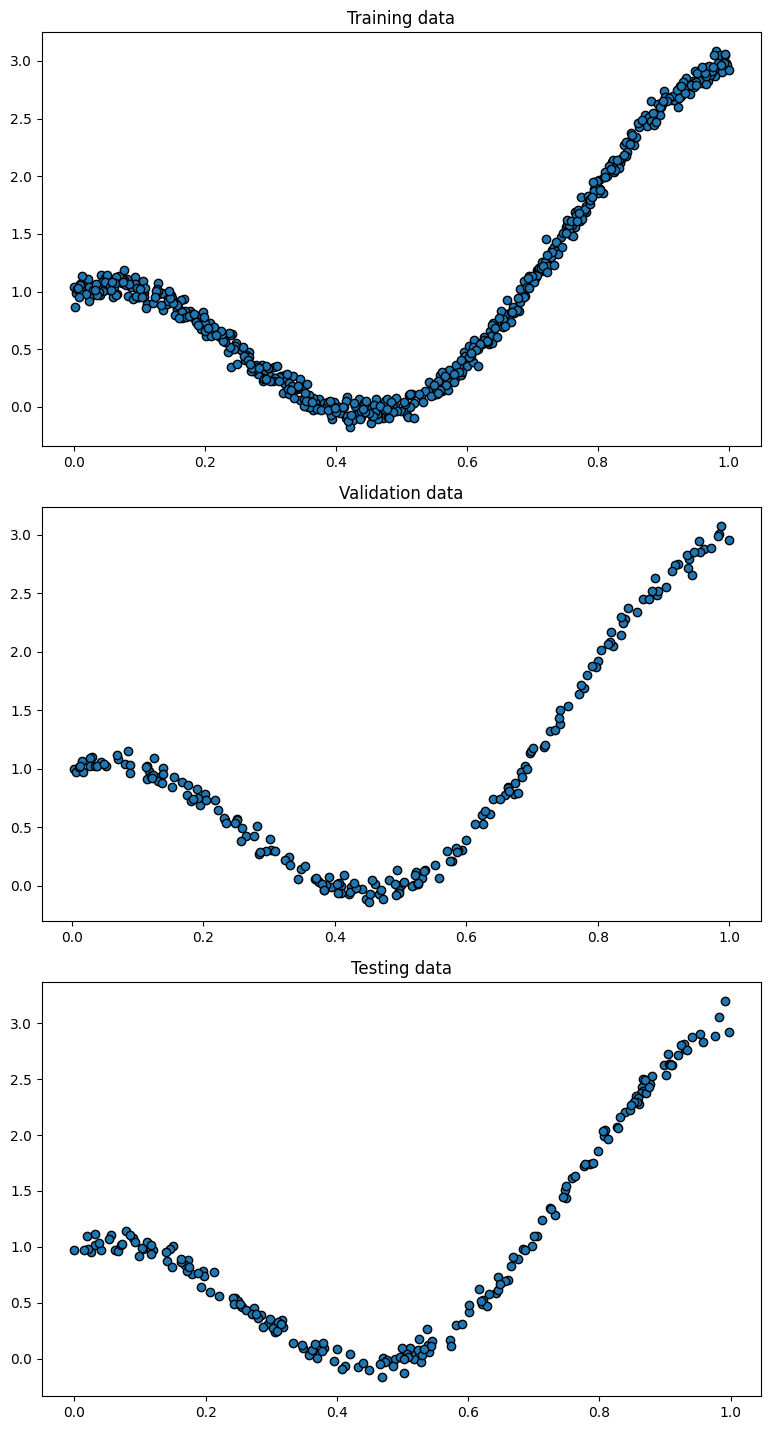

In [8]:
plt.figure()
plt.subplot(3, 1, 1)
plt.scatter(train[:, 0], train[:, 1], edgecolors='black')
plt.title('Training data')

plt.subplot(3, 1, 2)
plt.scatter(valid[:, 0], valid[:, 1], edgecolors='black')
plt.title('Validation data')

plt.subplot(3, 1, 3)
plt.scatter(test[:, 0], test[:, 1], edgecolors='black')
plt.title('Testing data')
plt.tight_layout(rect=[0, 0, 1.2, 3])
plt.show()

# Building the regressor

In [9]:
seed = 10
np.random.seed(seed)
neta = 0.02
max_epoch = 100
regressor = fcnn(node_layers=[1, 3, 1], max_epoch=max_epoch, learning_rate=neta, output_activation='linear')
epoch_err, valid_epoch_err = regressor.fit_regressor(train, valid)

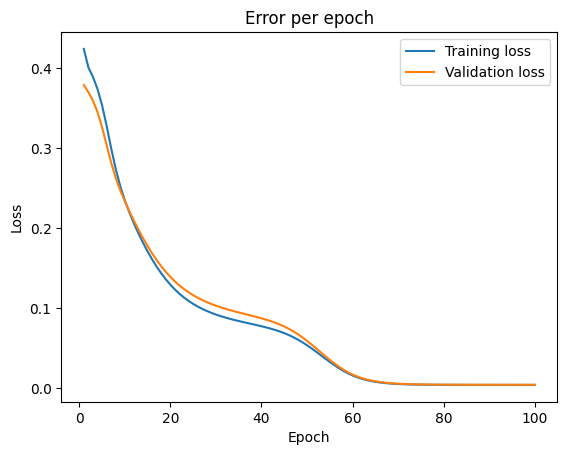

In [10]:
plt.title("Error per epoch")
plt.plot(range(1, len(epoch_err)+1), epoch_err, label='Training loss')
plt.plot(range(1, len(epoch_err)+1), valid_epoch_err, label='Validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()


In [11]:
pred = []
for x in train[:, 0]:
    pred.append(regressor.regress([x]))

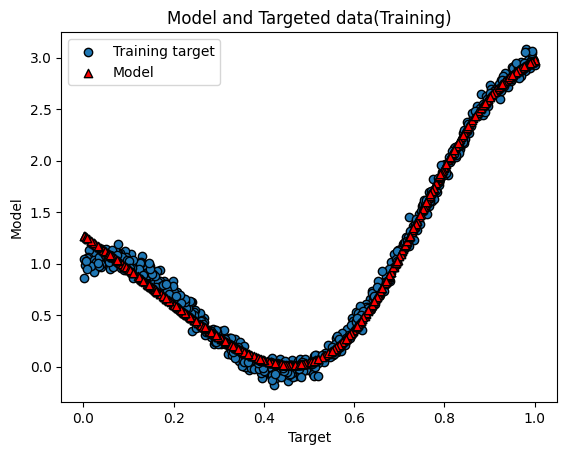

In [12]:
plt.scatter(train[:, 0], train[:, 1], label='Training target', edgecolors='black')
# plt.title('Training data for regression (Univariate data)')
plt.scatter(train[:, 0], pred, label='Model', color='red', edgecolors='black', marker='^')
plt.title('Model and Targeted data(Training)')
plt.xlabel('Target')
plt.ylabel('Model')
plt.legend()
plt.show()

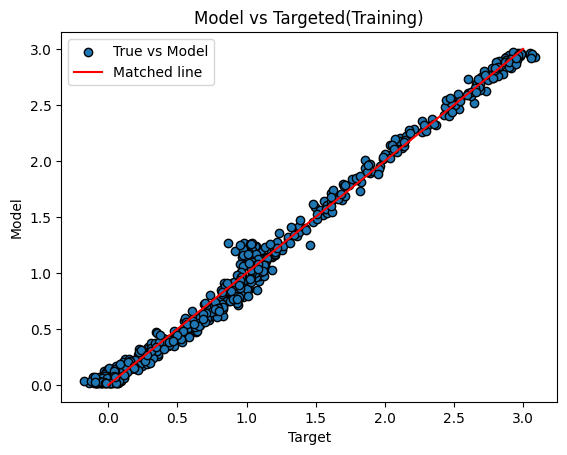

In [13]:
plt.scatter(train[:, 1], pred, label='True vs Model', edgecolors='black')
plt.plot([0, 3], [0, 3], color='red', label='Matched line')
plt.title('Model vs Targeted(Training)')
plt.xlabel('Target')
plt.ylabel('Model')
plt.legend()
plt.show()

# Validation

In [25]:
true_output = valid[:, -1:]
pred_output = []
for point in valid[:, :-1].reshape((-1, 1)):
    pred_output.append(regressor.regress(point))

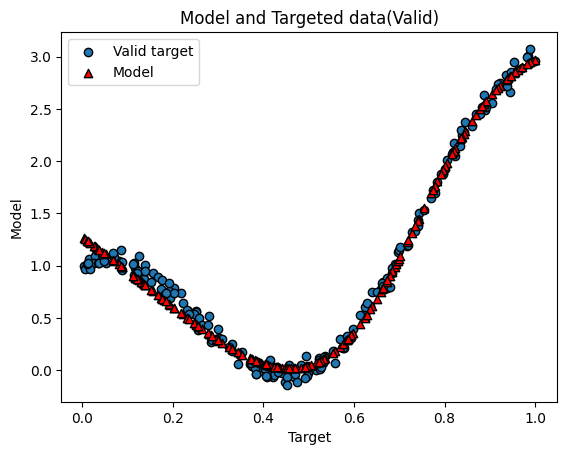

In [26]:
plt.scatter(valid[:, 0], valid[:, 1], label='Valid target', edgecolors='black')
# plt.title('Training data for regression (Univariate data)')
plt.scatter(valid[:, 0], pred_output, label='Model', color='red', edgecolors='black', marker='^')
plt.title('Model and Targeted data(Valid)')
plt.xlabel('Target')
plt.ylabel('Model')
plt.legend()
plt.show()

In [16]:
mse_valid = mean_squared_error(true_output, pred_output)
mse_valid

0.007891485746569362

# Test

In [17]:
true_output = test[:, -1:]
pred_output = []
for point in test[:, :-1].reshape((-1, 1)):
    pred_output.append(regressor.regress(point))

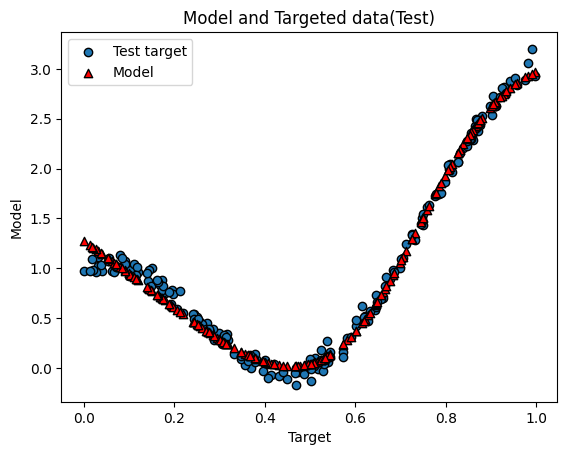

In [18]:
plt.scatter(test[:, 0], test[:, 1], label='Test target', edgecolors='black')
# plt.title('Training data for regression (Univariate data)')
plt.scatter(test[:, 0], pred_output, label='Model', color='red', edgecolors='black', marker='^')
plt.title('Model and Targeted data(Test)')
plt.xlabel('Target')
plt.ylabel('Model')
plt.legend()
plt.show()

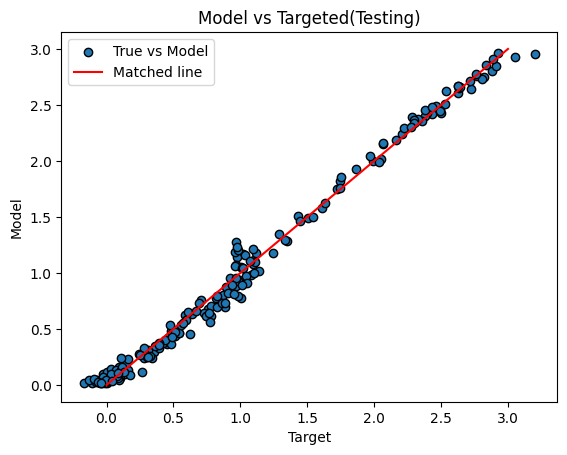

In [19]:
plt.scatter(test[:, 1], pred_output, label='True vs Model', edgecolors='black')
plt.plot([0, 3], [0, 3], color='red', label='Matched line')
plt.title('Model vs Targeted(Testing)')
plt.xlabel('Target')
plt.ylabel('Model')
plt.legend()
plt.show()

In [20]:
mse_test = mean_squared_error(true_output, pred_output)
mse_test

0.007334410408773214

In [21]:
train_output = train[:, -1:]
learned_output = [regressor.regress(point) for point in train[:, :-1].reshape((-1, 1))]
mse_train = mean_squared_error(train_output, learned_output)
mse_train

0.007414974971690332

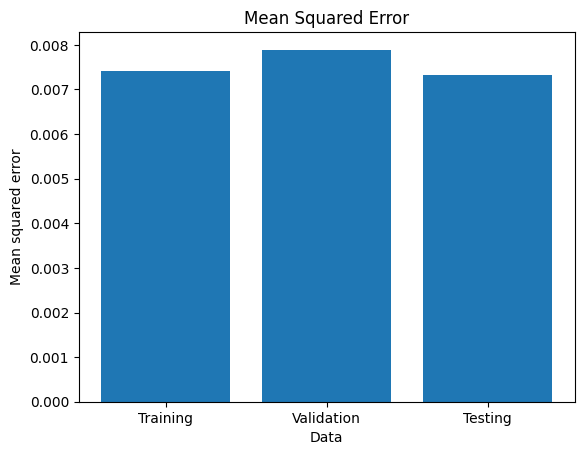

In [22]:
plt.bar(['Training', 'Validation', 'Testing'], [mse_train, mse_valid, mse_test])
plt.title('Mean Squared Error')
plt.xlabel('Data')
plt.ylabel('Mean squared error')
plt.show()

# Hidden layer output

IndexError: index 3 is out of bounds for axis 0 with size 3

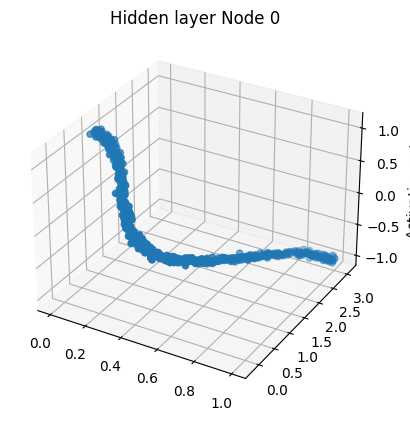

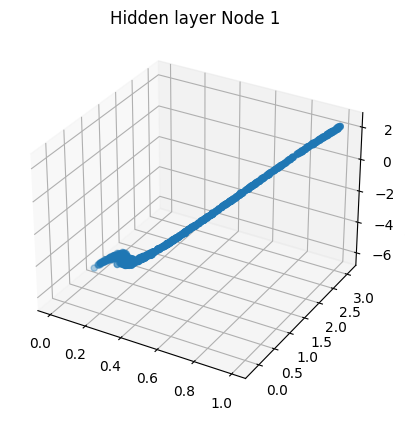

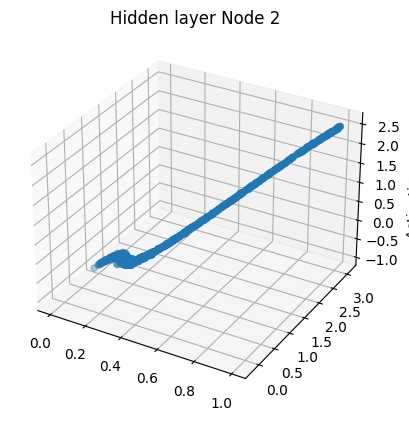

In [23]:
for node_number in range(10):
    node_class1 = []
    for sample in train:
        _, _, _, a = regressor.forward_propagate(sample[:-1])
        node_class1.append(a[node_number])
    plt.figure()    
    ax = plt.subplot(projection='3d')
    ax.scatter(train[:, 0], train[:, 1], node_class1)
    ax.set_zlabel('Activation value')
    ax.set_title(f'Hidden layer Node {node_number}')